In [747]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn")
sys.setrecursionlimit(100000)

params = {
    "font.family": "STIXGeneral",
    "mathtext.fontset": "stix",
    "axes.labelsize": 20,
    "legend.fontsize": 20,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "text.usetex": False,
    # "figure.figsize": [14, 6],
    # "figure.figsize": [7, 6],
    "figure.figsize": [10, 5],
    "axes.grid": True,
}

plt.rcParams.update(params)
plt.close("all")

# EXPERIMENT = f"N1000h0pbc0b"
EXPERIMENT = f"graph13"
DATA_FILENAME = f"data2/{EXPERIMENT}.npy"
data = np.load(DATA_FILENAME, allow_pickle=True)
data = data.item()

h = False
abs_v = False
quadratic = True

In [748]:
if h == False:

    graph_params = [
        ("N", data["params"]["N"]),
        ("J", data["params"]["J"]),
        ("h", data["params"]["h"]),
        ("\lambda", data["params"]["pbc"]),
    ]

else:

    graph_params = [
        ("N", data["params"]["N"]),
        ("J", data["params"]["J"]),
        ("T", data["params"]["T"]),
        ("\lambda", data["params"]["pbc"]),
    ]
    

graph_text = r""
for i, param in enumerate(graph_params):
    graph_text += fr"${param[0]} = {param[1]}$"

    if i < len(graph_params) - 1:
        graph_text += '\n'

0.6
0.6


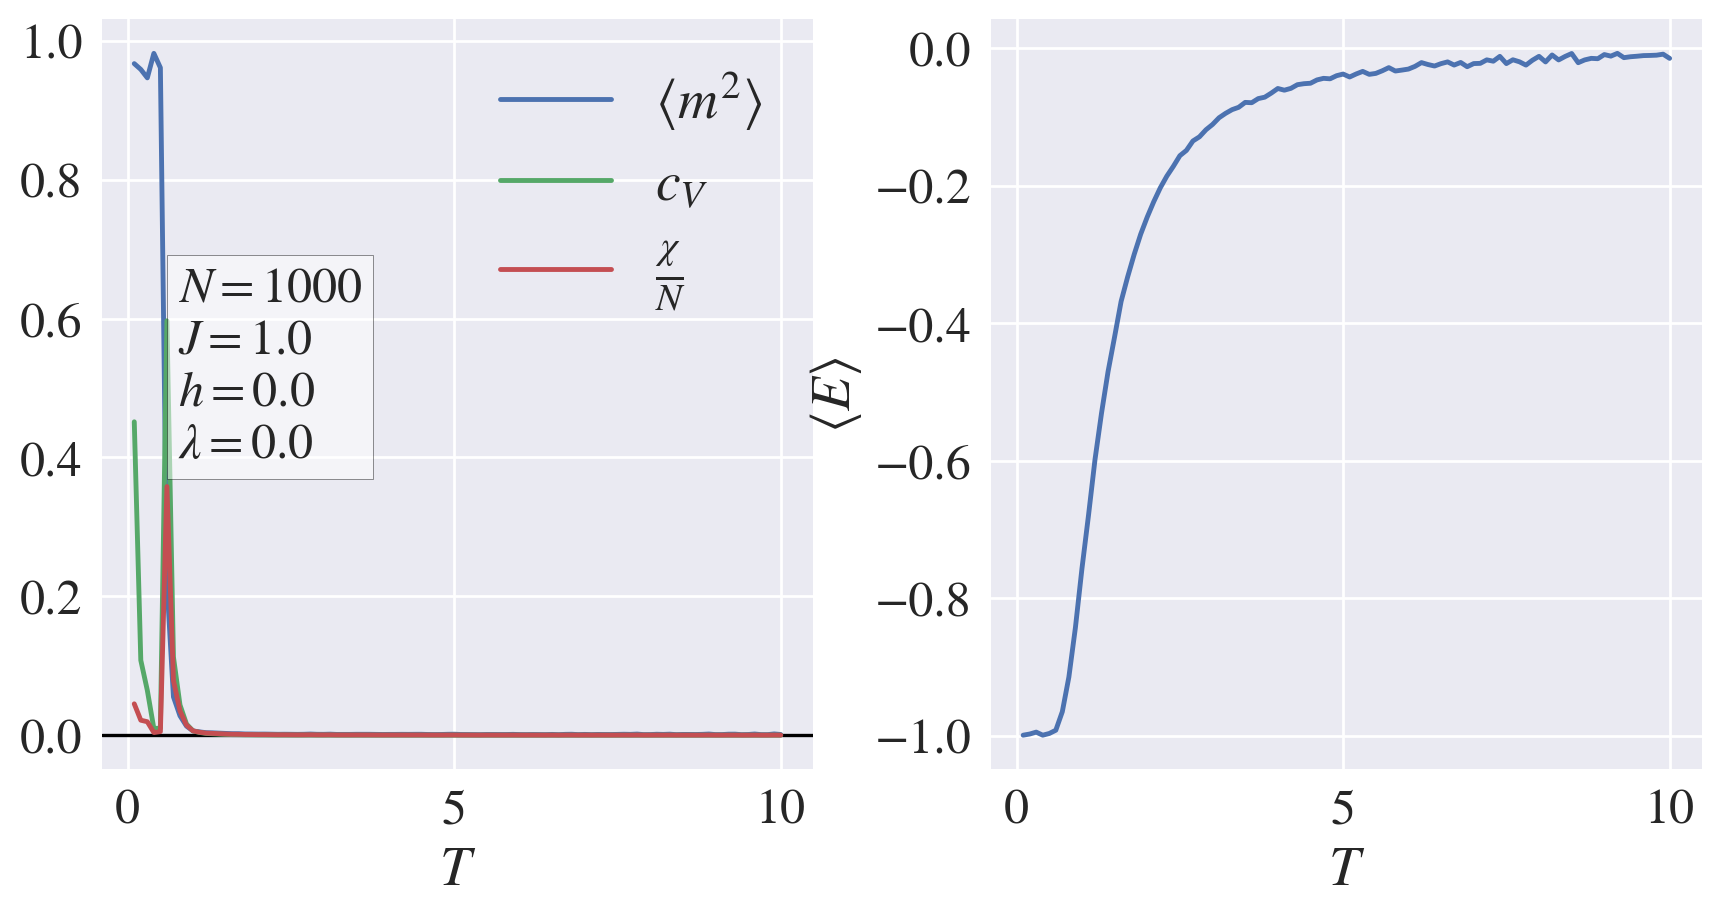

In [749]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=200)

# ax1.plot(data["x_values"], data["m_avgs"], '-o', label="Monte Carlo")

if h:
    ax1.set_xlabel(r"$h$")
else:
    ax1.set_xlabel(r"$T$")

# if abs_v:
#     ax1.set_ylabel(r"$\langle |m| \rangle$")
# else:
#     ax1.set_ylabel(r"$\langle m \rangle$")

ax1.axhline(y=0, color="k", linestyle="-", linewidth=1.2)
# ax2.axhline(y=0, color="k", linestyle="-", linewidth=1.2)

ax2.plot(data["x_values"], data["e_avgs"], '-', label="Monte Carlo")
# ax2.plot(data["x_values"], data["e_avgs"], '-o', label="Monte Carlo")

if h:
    ax2.set_xlabel(r"$h$")
else:
    ax2.set_xlabel(r"$T$")

ax2.set_ylabel(r"$\langle E \rangle$")

t = ax1.text(0.775, 0.4, graph_text, fontsize=18) # Graph 1
# t = ax1.text(0.775, 0.4, graph_text, fontsize=18) # Graph 1
# t = ax1.text(1.5, 0.4, graph_text, fontsize=18) # Graph 1 small
# t = ax1.text(6.3, 0.25, graph_text, fontsize=20) # Graph 1 small
# t = ax1.text(1.6, 0.74, graph_text, fontsize=18) # Graph 1 small
# t = ax1.text(0.2, 0.35, graph_text, fontsize=18) # Graph 1 small
# t = ax1.text(2.47, 0.67, graph_text, fontsize=18) # Graph 1 small abs
# t = ax1.text(2.47, 0.37, graph_text, fontsize=18) # Graph 1 small
# t = ax1.text(6.5, 0.67, graph_text, fontsize=18) # Graph 1 small >t
# t = ax1.text(9, 0.67, graph_text, fontsize=18) # Graph 2
# t = ax1.text(-0.4, 0.3, graph_text, fontsize=18) # Graph 3
t.set_bbox(dict(facecolor='#fff', alpha=0.5))


ax1.plot(data["x_values"], data["m_avgs"], '-', label=r"$\langle m^2 \rangle$")
# ax1.plot(data["x_values"], data["heats"], '-', label=r"$c_V$")
# ax1.plot(data["x_values"], data["suscept"], '-', label=r"$\frac{\chi}{N}$")

# ax1.legend(loc='best')

print(data['x_values'][np.argmax(data['suscept'])])
print(data['x_values'][np.argmax(data['heats'])])

plt.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.15, right=0.9, top=0.9, wspace=0.25, hspace=0.4)

fig.savefig(f'figures/{EXPERIMENT}.pdf')
# fig.savefig(f'figures/N50Parameters.pdf')
plt.show()

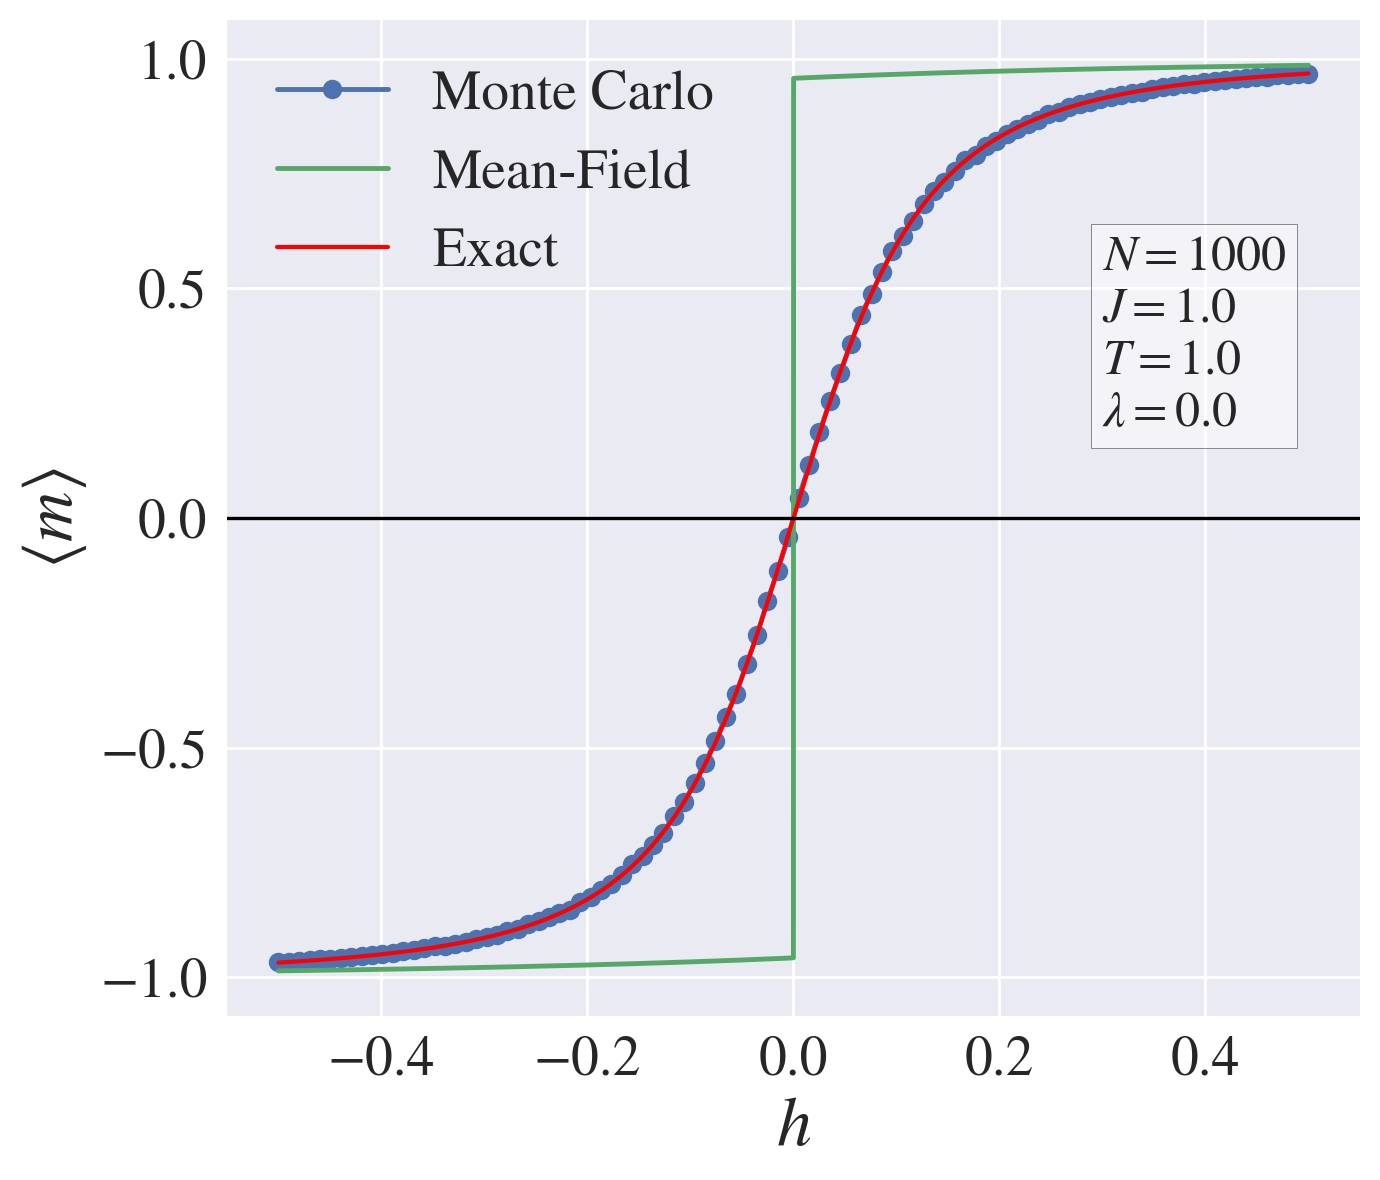

In [659]:
fig, ax = plt.subplots(dpi=200)

# plt.title("System Magnetization")
ax.plot(data["x_values"], data["m_avgs"], '-o', label="Monte Carlo")

ax.plot(data["x_a_values"], data["m_calc"], label="Mean-Field")

ax.plot(data["x_a_values"], data["m_exact"], 'r', label="Exact", linewidth=1.5)

if h:
    ax.set_xlabel(r"$h$")
else:
    ax.set_xlabel(r"$T$")

ax.set_ylabel(r"$\langle m \rangle$")
ax.axhline(y=0, color="k", linestyle="-", linewidth=1.2)

ax.legend()
# t = ax.text(7, 0.76, graph_text, fontsize=18) # Graph 2
# t = ax.text(-0.5, 0.2, graph_text, fontsize=18) # Graph 3
t = ax.text(0.3, 0.2, graph_text, fontsize=18) # Graph 3
t.set_bbox(dict(facecolor='#fff', alpha=0.5))

fig.tight_layout()

fig.savefig(f'figures/{EXPERIMENT}b.pdf')
plt.show()

In [699]:
from modulars import *

In [703]:
T = np.linspace(0.1, 200, 500)

J = 1
h = 0
N = 1000

# efunc = np.vectorize(get_energy_v2)

# y = efunc(T)

y = get_energy_density(T, J, N, h)

plt.plot(T, y)

TypeError: get_energy_density() missing 1 required positional argument: 'N'